<a href="https://colab.research.google.com/github/rajeevfromkrec/pytorch/blob/master/Image_classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset= MNIST(root='data/',download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
len(dataset)

60000

In [6]:
test_dataset= MNIST(root='data/' ,train=False)

In [7]:
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F236E8BAB38>, 5)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

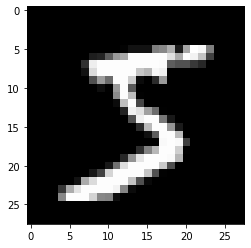

In [10]:
image, label= dataset[0]
plt.imshow(image, cmap='gray')

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset= MNIST(root='data/',transform=transforms.ToTensor(),train=True)

In [13]:
image_tensor, label =dataset[0]
image_tensor.shape

torch.Size([1, 28, 28])

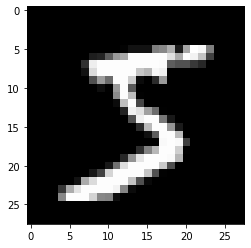

In [14]:
plt.imshow(image_tensor.reshape(28,28), cmap='gray')

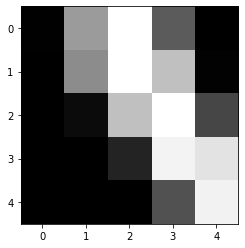

In [15]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');


In [16]:
from torch.utils.data import random_split

In [17]:
train_ds, val_ds= random_split(dataset, [50000, 10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [55]:
from torch.utils.data import DataLoader

In [56]:
batch_size=128

In [57]:
train_loader= DataLoader(train_ds,batch_size,shuffle=True, drop_last=True)
val_loader= DataLoader(val_ds, batch_size,drop_last=True)



In [22]:
import torch.nn as nn

In [23]:
input_size= 28*28
num_classes=10
model= nn.Linear(input_size, num_classes)

In [24]:
print(model.weight.shape)

torch.Size([10, 784])


In [25]:
model.weight

Parameter containing:
tensor([[-0.0152,  0.0176,  0.0311,  ..., -0.0143,  0.0097, -0.0173],
        [ 0.0205,  0.0301, -0.0202,  ...,  0.0124,  0.0351,  0.0162],
        [-0.0211, -0.0232, -0.0257,  ..., -0.0218, -0.0064, -0.0151],
        ...,
        [ 0.0295,  0.0028, -0.0209,  ...,  0.0168,  0.0158,  0.0304],
        [ 0.0017, -0.0051, -0.0171,  ..., -0.0293, -0.0072,  0.0207],
        [ 0.0010, -0.0262, -0.0005,  ...,  0.0355, -0.0293,  0.0101]],
       requires_grad=True)

In [26]:
model.bias

Parameter containing:
tensor([-0.0347,  0.0195,  0.0314, -0.0315,  0.0243, -0.0216, -0.0323, -0.0070,
        -0.0348, -0.0021], requires_grad=True)

In [27]:
for images,label in train_loader:
  print(label)
  print(images.shape)
  outputs=model(images)
  break

tensor([5, 3, 8, 0, 8, 6, 6, 7, 5, 3, 4, 6, 4, 2, 7, 8, 3, 1, 9, 8, 2, 1, 8, 2,
        5, 5, 6, 9, 6, 0, 8, 0, 7, 6, 2, 1, 1, 3, 7, 2, 1, 0, 7, 6, 8, 9, 1, 0,
        8, 5, 2, 8, 3, 3, 4, 9, 0, 1, 6, 0, 3, 0, 8, 7, 4, 6, 3, 8, 9, 9, 6, 0,
        9, 1, 9, 3, 8, 8, 6, 9, 9, 1, 9, 4, 2, 6, 9, 1, 5, 2, 3, 5, 1, 7, 3, 4,
        1, 6, 9, 1, 8, 2, 2, 1, 3, 8, 3, 7, 0, 5, 0, 3, 1, 9, 2, 1, 4, 9, 6, 3,
        8, 3, 8, 3, 6, 2, 1, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [28]:
class Mnistmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size, num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

In [29]:
model=Mnistmodel()

In [30]:
print( model.linear.weight.shape)

torch.Size([10, 784])


In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0211, -0.0031, -0.0155,  ...,  0.0146,  0.0074,  0.0166],
         [-0.0162, -0.0236, -0.0155,  ...,  0.0355,  0.0048, -0.0014],
         [ 0.0216,  0.0034,  0.0260,  ...,  0.0334,  0.0295,  0.0146],
         ...,
         [-0.0342, -0.0351,  0.0041,  ..., -0.0095,  0.0027,  0.0123],
         [ 0.0157, -0.0205,  0.0112,  ...,  0.0202,  0.0027, -0.0130],
         [ 0.0087,  0.0131, -0.0317,  ...,  0.0230,  0.0314, -0.0258]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0150,  0.0271,  0.0148,  0.0339, -0.0202, -0.0113, -0.0306, -0.0249,
          0.0331,  0.0040], requires_grad=True)]

In [32]:
for inages, labels in train_loader:
  output=model(images)
  break


In [33]:
print(output.shape)

torch.Size([128, 10])


In [34]:
output[:2,:].data

tensor([[ 0.1485,  0.0569,  0.6096,  0.1423,  0.0085,  0.3705, -0.0304, -0.3919,
         -0.0214, -0.0444],
        [ 0.4438,  0.0800,  0.4040,  0.5661, -0.0198,  0.4415, -0.2600, -0.0780,
         -0.1464, -0.2509]])

In [35]:
import torch.nn.functional as F

In [36]:
probs=F.softmax(output,dim=1)

In [37]:
probs[:2].data

tensor([[0.1031, 0.0941, 0.1635, 0.1025, 0.0897, 0.1288, 0.0862, 0.0601, 0.0870,
         0.0850],
        [0.1324, 0.0920, 0.1272, 0.1496, 0.0833, 0.1321, 0.0655, 0.0786, 0.0734,
         0.0661]])

In [38]:
torch.sum(probs[0]).item()

1.0

In [39]:
max_probs,pred=torch.max(probs, dim=1)

In [40]:
print(pred)

tensor([2, 3, 2, 2, 2, 0, 0, 0, 5, 2, 0, 0, 5, 0, 5, 2, 0, 3, 5, 0, 4, 3, 0, 1,
        2, 4, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 5, 0, 5, 5, 0, 2,
        2, 2, 0, 0, 5, 3, 5, 5, 0, 5, 0, 0, 2, 0, 2, 5, 5, 0, 0, 0, 5, 4, 0, 2,
        5, 2, 5, 5, 2, 4, 0, 0, 5, 2, 5, 5, 0, 0, 5, 2, 5, 0, 2, 5, 2, 0, 0, 2,
        2, 0, 3, 4, 2, 4, 4, 3, 5, 0, 1, 2, 0, 5, 3, 2, 1, 5, 0, 4, 3, 0, 0, 2,
        2, 2, 0, 2, 2, 0, 3, 0])


In [41]:
def accuracy(output, labels):
  _,preds= torch.max(output, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [42]:
accuracy(output,labels)

tensor(0.0781)

In [43]:
loss_fn= F.cross_entropy

loss= loss_fn(output,labels)
print(loss.item())

2.3382699489593506


In [59]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [60]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [61]:
def fit(epochs, lr,model,train_loader,val_loader,opt_func= torch.optim.SGD):
  history=[]
  optimizer =opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result=evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [62]:
evaluate(model,val_loader)

{'val_acc': 0.13892227411270142, 'val_loss': 2.301968812942505}

In [1]:
history1= fit(5, .001, model,train_loader, val_loader)

NameError: ignored